In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import numpy as np
import math

### 1. Counting Experiment (As given in the paper in section 5.1)

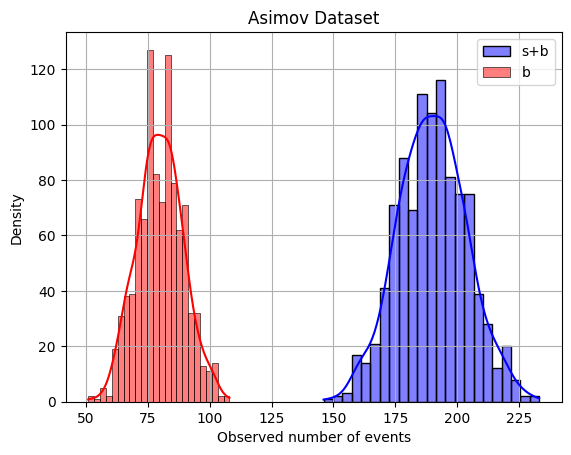

In [2]:
# model parameters
mu  = 1         # signal strength parameter
s   = 90        # mean number of signal events
b   = 100       # mean number of background events
tau = 0.8       # known parameter connectng m and b

# expectation values
E_n = mu * s + b # expected number of signal events
E_m = tau * b   # expected number of background events

# generate Asimov dataset
asimov_n = np.random.poisson(E_n, size=1000)  # n ~ Pois(E_n) = Pois(mu*s + b)
asimov_m = np.random.poisson(E_m, size=1000)  # m ~ Pois(E_m) = Pois(tau*b)

# plot the asimov dataset
sns.histplot(asimov_n, kde=True, color='blue', label='s+b')
sns.histplot(asimov_m, kde=True, color='red', label='b')

plt.xlabel("Observed number of events")
plt.ylabel("Density")
plt.title("Asimov Dataset")
plt.grid(True)
plt.legend()
plt.show()



In [44]:
def likelihood(n, m, mu, s, b, tau):
    prob_n = ((mu * s + b) ** n) / math.factorial(n) * math.exp(-(mu * s + b))
    prob_m = ((tau * b) ** m) / math.factorial(m) * math.exp(-(tau * b))
    return prob_n * prob_m

def mu_hat(n, m, tau, s):
    return (n - (m/tau)) / (s)

def b_hat(m, tau):
    return m / tau

def b_hat_hat(n, m, mu, s, tau):
    term1_num = n + m - (1+tau)*mu*s
    term1_den = 2*(1+tau)
    term1 = term1_num / term1_den

    term2_num = (n + m - (1+tau)*mu*s)**2 + 4*(1+tau)*m*mu*s
    term2_den = 4*(1+tau)**2
    term2 = np.sqrt(term2_num / term2_den)

    return term1 + term2

def lambda_mu(n, m, mu, b_hat_hat, mu_hat, b_hat):
    num = likelihood(n, m, mu, s, b_hat_hat, tau)
    den = likelihood(n, m, mu_hat, s, b_hat, tau)
    return num / den

def q_0(n, m, b_hat_hat, mu_hat_val, b_hat_val, mu):
    if mu_hat_val >= 0:
        return -2 * np.log(lambda_mu(n, m, mu, b_hat_hat, mu_hat_val, b_hat_val))
    else:
        return 0


In [47]:
# Monte Carlo to generate the distributions for q_0 i.e. f(q_0|H0) and f(q_0|H1)
s   = 10        # mean number of signal events
b   = 5         # mean number of background events
tau = 1         # known parameter connectng m and b
mu = 1

# expectation values
E_n = mu*s + b # expected number of signal events
E_m = tau* b   # expected number of background events

# generate Asimov dataset
asimov_n = np.random.poisson(E_n, size=1000)  # n ~ Pois(E_n) = Pois(mu*s + b)
asimov_m = np.random.poisson(E_m, size=1000)  # m ~ Pois(E_m) = Pois(tau*b)

q0_mu0_list, q0_mu1_list = [], []


for _ in range(1000):
    # sample n and m from  asimov_n and asimov_m respectively:
    n = np.random.choice(asimov_n)
    m = np.random.choice(asimov_m)

    # calculate the MLE
    mu_hat_val = mu_hat(n, m, tau, s)
    b_hat_val = b_hat(m, tau)

    # Calculate q0 under the null hypothesis (mu=0)
    mu = 0
    b_hat_hat_val = b_hat_hat(n, m, mu, s, tau) 
    q0_m0 = q_0(n, m, b_hat_hat_val, mu_hat_val, b_hat_val, mu)
    q0_mu0_list.append(q0_m0)

    # Calculate q0 under the alternative hypothesis (mu=1)
    mu = 1
    b_hat_hat_val = b_hat_hat(n, m, mu, s, tau) 
    q0_m1 = q_0(n, m, b_hat_hat_val, mu_hat_val, b_hat_val, mu)
    q0_mu1_list.append(q0_m1)


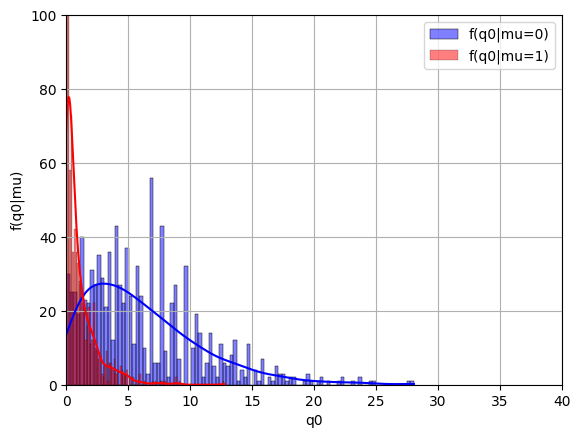

In [48]:
# plot the distribution of f(q0|H0) = f(q0|mu=0)
sns.histplot(q0_mu0_list, kde=True, color='blue', label='f(q0|mu=0)', bins=100)
sns.histplot(q0_mu1_list, kde=True, color='red', label='f(q0|mu=1)', bins=100)

plt.xlabel("q0")
plt.ylabel("f(q0|mu)")
plt.xlim(0, 40)
plt.ylim(0,100)
plt.grid(True)
plt.legend()
plt.show()


In [52]:
# Monte Carlo to generate the distributions for q_0 i.e. f(q_0|H0) and f(q_0|H1)
s   = 10        # mean number of signal events
b   = 20        # mean numeber of background events
tau = 1         # known parameter connectng m and b
mu = 1

# expectation values
E_n = mu*s + b # expected number of signal events
E_m = tau* b   # expected number of background events

# generate Asimov dataset
asimov_n = np.random.poisson(E_n, size=1000)  # n ~ Pois(E_n) = Pois(mu*s + b)
asimov_m = np.random.poisson(E_m, size=1000)  # m ~ Pois(E_m) = Pois(tau*b)

q0_mu0_list20 = []


for _ in range(1000):
    # sample n and m from  asimov_n and asimov_m respectively:
    n = np.random.choice(asimov_n)
    m = np.random.choice(asimov_m)

    # calculate the MLE
    mu_hat_val = mu_hat(n, m, tau, s)
    b_hat_val = b_hat(m, tau)

    # Calculate q0 under the null hypothesis (mu=0)
    mu = 0
    b_hat_hat_val = b_hat_hat(n, m, mu, s, tau) 
    q0_m0 = q_0(n, m, b_hat_hat_val, mu_hat_val, b_hat_val, mu)
    q0_mu0_list20.append(q0_m0)


# 0. Some Helper Functions

In [2]:
def calculate_b_hat(m, tau):
    return m / tau

def calculate_mu_hat(n, m, tau, s):
    num = n - m / tau
    den = s
    return num / den

def calculate_b_hat_hat(n, m, tau, s, mu):
    term1_num = n + m - (1+tau) * mu * s
    term1_den = 2*(1 + tau)
    term1 = term1_num / term1_den

    term2_num = (n + m - (1 + tau) * mu * s)**2 + 4*(1 + tau) * m * mu * s
    term2_den = 4*(1 + tau)**2
    term2 = term2_num/  term2_den

    return term1 + np.sqrt(term2)

def calculate_L(n, m, tau, s, mu, b):
    prob_n = ((mu * s + b)**n / math.factorial(n)) * np.exp(-(mu *s + b))
    prob_m = ((tau * b)**m / math.factorial(m)) * np.exp(-(tau * b))
    return prob_n * prob_m

def calculate_q0(b_hat_hat, mu_hat, b_hat):
    if mu_hat < 0:
        return 0
    else:
        num = calculate_L(n, m, tau, s, 0, b_hat_hat)
        den = calculate_L(n, m, tau, s, mu_hat, b_hat) 
        return -2 * np.log((num) / (den))


# 1. Counting Experiment 
In this experiment, only a single bin is considered.

We are testing for discovery right now, so we have the following hypothesis:
 - $\text{H}_{0}$: $\mu = 0$ i.e. no signal
 - $\text{H}_{1}$: $\mu = 1$ i.e. signal + background
  

We plot the distribution of $q_{0}$ given the null hypothesis i.e. $f(q_{\text{H}_{0}}|\mu \text{ assumed in the data}) = f(q_{\mu = 0}|\mu=0) = f(q_{0}|\mu=0)$. 
<br>We will use the asimov dataset with $s=10, \tau=1$ and varying levels of $b$. The distribution $f(q_{0}|\mu=0)$ will be plotted using two ways:
1. By sampling from different Asimov Datasets each having a different value of $b$.
2. By using the asymptotc formula presented in the paper.

### 1.1 Monte Carlo Simulation

In [17]:
# initial parameters
s        = 10                                       # mean number of signal events
b_vals   = [2, 5, 10, 15, 20]                       # mean number of background events
tau      = 1                                        # known parameter connectng m and b
mu       = 0                                        # signal strength (assumed in the data to be 0)

# # expectation values
# E_n = mu * s + b                                    # expected number of signal events
# E_m = tau * b                                       # expected number of background events 

# # generate Asimov dataset
# asimov_n = np.random.poisson(E_n, size=1000000)     # n ~ Pois(E_n) = Pois(mu*s + b)
# asimov_m = np.random.poisson(E_m, size=10000000)     # m ~ Pois(E_m) = Pois(tau*b)

# monte carlo loop with 10,000 iterations
np.random.seed(42)
num_iter = 100000
b_dict = {}
for b in b_vals:

    # expectation values
    E_n = mu * s + b                                    # expected number of signal events
    E_m = tau * b                                       # expected number of background events 

    # generate Asimov dataset
    asimov_n = np.random.poisson(E_n, size=1000000)     # n ~ Pois(E_n) = Pois(mu*s + b)
    asimov_m = np.random.poisson(E_m, size=1000000)     # m ~ Pois(E_m) = Pois(tau*b)

    q0_vals = []
    for _ in range(num_iter):
        
        # sample n and m from  asimov_n and asimov_m respectively:
        np.random.seed(None)
        n = np.random.choice(asimov_n)
        m = np.random.choice(asimov_m)

        # calculate the MLE
        mu_hat      = calculate_mu_hat(n, m, tau, s)
        b_hat       = calculate_b_hat(m, tau)
        b_hat_hat   = calculate_b_hat_hat(n, m, tau, s, mu)

        # calculate the discovery statistic (q0)
        q0 = calculate_q0(b_hat_hat, mu_hat, b_hat)
        q0_vals.append(q0)
    b_dict[b] = q0_vals


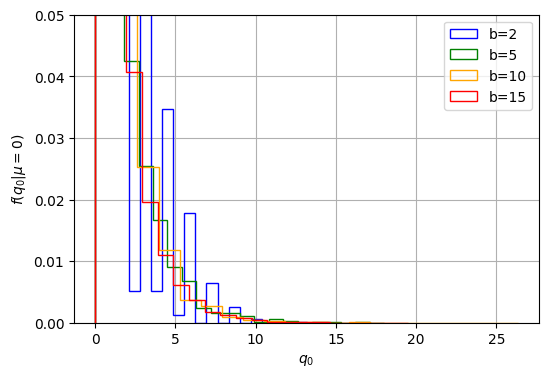

In [18]:
# plot histogram for each one of them
plt.figure(figsize=(6, 4)) 
plt.hist(b_dict[b_vals[0]], color='blue', histtype='step', label=f'b={b_vals[0]}', bins=20, density=True)
plt.hist(b_dict[b_vals[1]], color='green', histtype='step', label=f'b={b_vals[1]}', bins=20, density=True)
plt.hist(b_dict[b_vals[2]], color='orange', histtype='step', label=f'b={b_vals[2]}', bins=20, density=True)
plt.hist(b_dict[b_vals[3]], color='red', histtype='step', label=f'b={b_vals[3]}', bins=20, density=True)

plt.xlabel("$q_{0}$")
plt.ylabel("$f(q_{0}|\mu=0)$")
plt.ylim(0,0.05)
plt.grid(True)
plt.legend()
plt.show()


### 1.2 Asymptotic Distribution

The asymptotic distribution is given as following:

$$

f(q_{0}|0) = \frac{1}{2}\delta(q_{0}) + \frac{1}{2} \frac{1}{\sqrt{2 \pi}} \frac{1}{\sqrt{q_{0}}} e^{-\frac{q_{0}}{2}}

$$

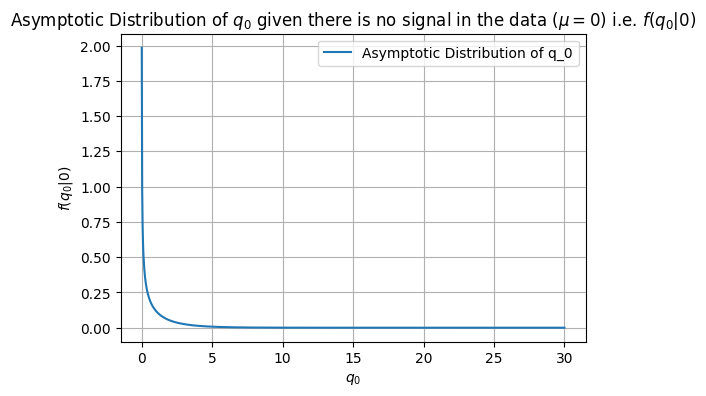

In [24]:
# Define the function for the asymptotic distribution of q_0
def asymptotic_distribution_q0(q_0):
    delta_q0 = 0.5 * np.isclose(q_0, 0)                                          # Delta function
    chi_squared_pdf = 0.5 * (1 / (np.sqrt(2 * np.pi * q_0)) * np.exp(-q_0 / 2))  # PDF of chi-squared distribution
    
    return delta_q0 + chi_squared_pdf

# Generate a range of q_0 values
q_0_values = np.linspace(0.01, 30, 1000)  

# Calculate the corresponding probabilities for the asymptotic distribution
asymp_pdf_q0 = asymptotic_distribution_q0(q_0_values)

# Plotting the distribution
plt.figure(figsize=(6,4))
plt.plot(q_0_values, asymp_pdf_q0, label='Asymptotic Distribution of q_0')
plt.xlabel('$q_{0}$')
plt.ylabel('$f(q_{0}|0)$')
plt.title('Asymptotic Distribution of $q_{0}$ given there is no signal in the data $(\mu=0)$ i.e. $f(q_{0}|0)$')
plt.legend()
plt.grid(True)
plt.show()


### 1.3 Comparing the Two Distributions

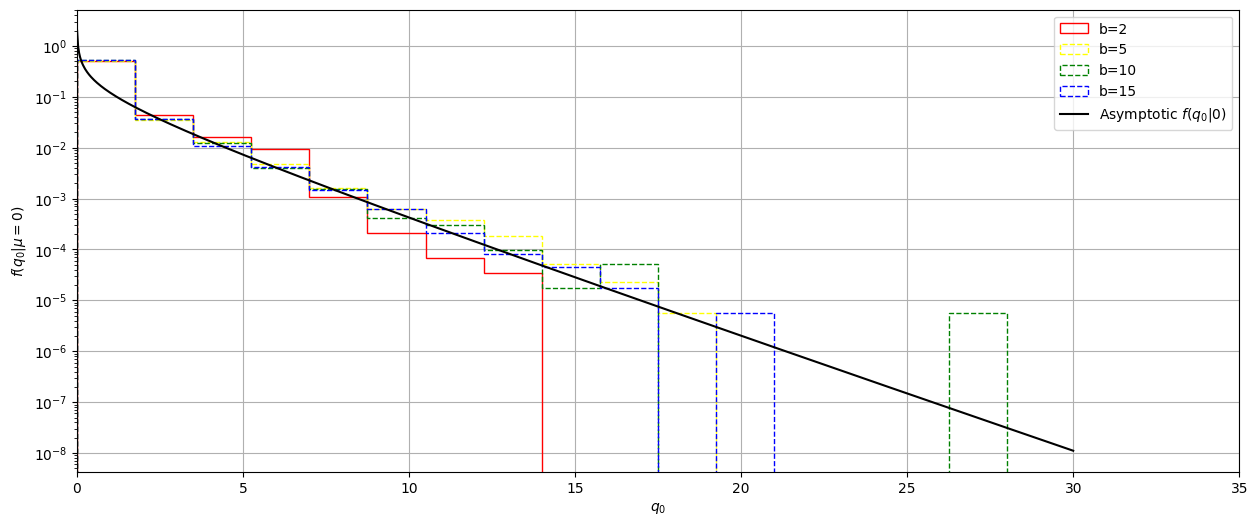

In [38]:
# plot the histogram for each one of them
plt.figure(figsize=(15, 6)) 
plt.hist(b_dict[b_vals[0]], color='red', histtype='step', label=f'b={b_vals[0]}', density=True, linestyle='-', bins=20, range=(0,35))
plt.hist(b_dict[b_vals[1]], color='yellow', histtype='step', label=f'b={b_vals[1]}',  density=True, linestyle='--', bins=20, range=(0,35))
plt.hist(b_dict[b_vals[2]], color='green', histtype='step', label=f'b={b_vals[2]}',  density=True, linestyle='--', bins=20, range=(0,35))
plt.hist(b_dict[b_vals[3]], color='blue', histtype='step', label=f'b={b_vals[3]}',  density=True, linestyle='--', bins=20, range=(0,35))
plt.plot(q_0_values, asymp_pdf_q0, label='Asymptotic $f(q_{0}|0)$', color='black')


plt.yscale('log')
plt.xlabel("$q_{0}$")
plt.ylabel("$f(q_{0}|\mu=0)$")
# plt.ylim(1e-8,0.00025)
plt.xlim(0,35)
plt.grid(True)
plt.legend()
plt.show()


### 1.4 Comparing $f(q_{0}|\mu = 0)$ and $f(q_{0}|\mu = 1)$

In [30]:
# common params
s   = 10
b   = 10
tau = 1


In [31]:
# f(q_{0}|\mu = 0)
mu = 0                                              # data has no signal

E_n = mu * s + b                                    # expected number of signal events
E_m = tau * b                                       # expected number of background events 

asimov_n = np.random.poisson(E_n, size=10000000)     # n ~ Pois(E_n) = Pois(mu*s + b)
asimov_m = np.random.poisson(E_m, size=10000000)     # m ~ Pois(E_m) = Pois(tau*b)

num_iter = 1000000
q0_0_vals = []
for _ in range(num_iter):
    
    # sample n and m from  asimov_n and asimov_m respectively
    n = np.random.choice(asimov_n)
    m = np.random.choice(asimov_m)

    # calculate the MLE
    mu_hat      = calculate_mu_hat(n, m, tau, s)
    b_hat       = calculate_b_hat(m, tau)
    b_hat_hat   = calculate_b_hat_hat(n, m, tau, s, mu)

    # calculate the discovery statistic (q0)
    q0 = calculate_q0(b_hat_hat, mu_hat, b_hat)
    q0_0_vals.append(q0)


In [32]:
# f(q_{0}|\mu = 1)
mu = 1                                              # data has signal + background

E_n = mu * s + b                                    # expected number of signal events
E_m = tau * b                                       # expected number of background events 

asimov_n = np.random.poisson(E_n, size=10000000)     # n ~ Pois(E_n) = Pois(mu*s + b)
asimov_m = np.random.poisson(E_m, size=10000000)     # m ~ Pois(E_m) = Pois(tau*b)

num_iter = 1000000
q0_1_vals = []
for _ in range(num_iter):
    
    # sample n and m from  asimov_n and asimov_m respectively:
    n = np.random.choice(asimov_n)
    m = np.random.choice(asimov_m)

    # calculate the MLE
    mu_hat      = calculate_mu_hat(n, m, tau, s)
    b_hat       = calculate_b_hat(m, tau)
    b_hat_hat   = calculate_b_hat_hat(n, m, tau, s, mu)

    # calculate the discovery statistic (q0)
    q0 = calculate_q0(b_hat_hat, mu_hat, b_hat)
    q0_1_vals.append(q0)

q0_1_vals = np.array(q0_1_vals, dtype=float)
q0_1_vals_no_inf = q0_1_vals[~np.isinf(q0_1_vals)]


/tmp/ipykernel_6708/1271131860.py:31: RuntimeWarning: divide by zero encountered in log
  return -2 * np.log((num) / (den))


In [53]:
# asymptotic based f(q_0|1)
def asymptotic_distribution_q0_1(q0_vals, mu, sigma):
    delta = (1 - np.abs(mu / sigma)) * (q0_vals == 0)
    non_delta = 0.5 * ((1.0) / ((np.sqrt(2.0 * np.pi) * np.sqrt(q0_vals)))) * np.exp(-0.5 * (np.sqrt(q0_vals) - (mu / sigma))**2)
    return delta + non_delta


mu = 1  
n = mu * s + b
m = tau * b

mu_hat      = calculate_mu_hat(n, m, tau, s)
b_hat       = calculate_b_hat(m, tau)
b_hat_hat   = calculate_b_hat_hat(n, m, tau, s, mu)
q0_A        = calculate_q0(b_hat_hat, mu_hat, b_hat)
sigma_A     = np.sqrt(mu**2 / q0_A) 


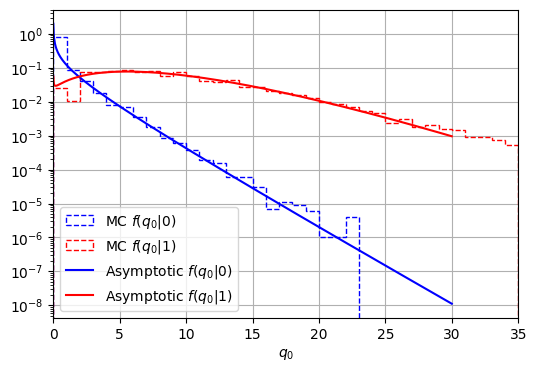

In [54]:
# plotting the histogram
plt.figure(figsize=(6, 4)) 

# monte carlo
plt.hist(q0_0_vals, color='blue', histtype='step', label='MC $f(q_{0}|0)$', density=True, bins=35, linestyle='--', range=(0,35))
plt.hist(q0_1_vals_no_inf, color='red', histtype='step', label='MC $f(q_{0}|1)$', density=True, bins=35, linestyle='--',range=(0,35))

# asymptotic
q_0_values = np.linspace(0.01, 30, 1000)  
asymp_pdf_q0_0 = asymptotic_distribution_q0(q_0_values)
asymp_pdf_q0_1 = asymptotic_distribution_q0_1(q_0_values, mu, sigma_A)
plt.plot(q_0_values, asymp_pdf_q0_0, label='Asymptotic $f(q_{0}|0)$', color='blue')
plt.plot(q_0_values, asymp_pdf_q0_1, label='Asymptotic $f(q_{0}|1)$', color='red')


plt.yscale("log")
plt.xlabel("$q_{0}$")
# plt.ylabel("$f(q_{0}|\mu=0)$")
# plt.ylim(0,0.2)
plt.xlim(0,35)
plt.grid(True)
plt.legend()
plt.show()
